# Outlier Detection

- very crucial for ML models, Results might be different/worng due to outliers, so its a huge step to remove outleirs from the data
- We will make use of distribution plot, and boxplot to tackle the outliers problem

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv('indian_properties_cleaned_v2.csv')
df.head()

property_type                 society      sector  price  price_per_sqft  \
0          flat  experion the heartsong  sector 108   1.68          8387.0   
1          flat         emaar digihomes   sector 62   2.45         16000.0   
2         house             independent   sector 43   5.50          2716.0   
3         house             independent   sector 38   3.90         21242.0   
4         house             independent   sector 27   4.25         31481.0   

      area                                       areaWithType  bedRoom  \
0   2003.0  Super Built up area 2003(186.08 sq.m.)Built Up...        3   
1   1531.0  Built Up area: 1200 (111.48 sq.m.)Carpet area:...        2   
2  20250.0  Plot area 215(179.77 sq.m.)Built Up area: 2850...        8   
3   1836.0                        Plot area 204(170.57 sq.m.)        6   
4   1350.0  Plot area 163(136.29 sq.m.)Built Up area: 161 ...        5   

   bathroom balcony  ...  super_built_up_area built_up_area carpet_area  \
0         3      3+  ...               2003.0       1338.29      986.41   
1         2       2  ...                  NaN       1200.00     1000.00   
2         7      3+  ...                  NaN       2850.00     2250.00   
3         6      3+  ...                  NaN       1836.00         NaN   
4         5      3+  ...                  NaN        161.00      150.00   

   study room  servant room  store room  pooja room  others  furnishing_type  \
0           1             1           0           0       0                2   
1           1             0           0           0       0                0   
2           1             1           0           1       1                2   
3           1             1           0           1       0                1   
4           0             1           0           1       0                2   

   luxury_score  
0            86  
1           174  
2           123  
3            32  
4            49  

[5 rows x 23 columns]

In [60]:
# lets chech the shape of our data
df.shape

(3803, 23)

In [61]:
# lets check for the latest columns from our data
print(df.columns, '\n')
print(' => No of columns : ',len(df.columns))

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object') 

 => No of columns :  23


# First lets check outliers for the numerical columns

## 1. Price 

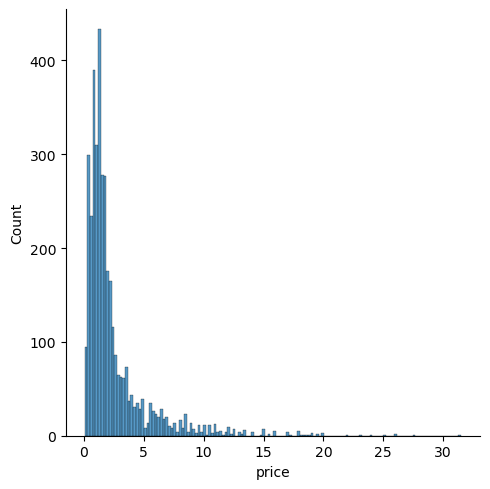

In [62]:
# price column

sns.displot(df['price'])

# as we can see this is not normally distributed

<AxesSubplot: xlabel='price'>

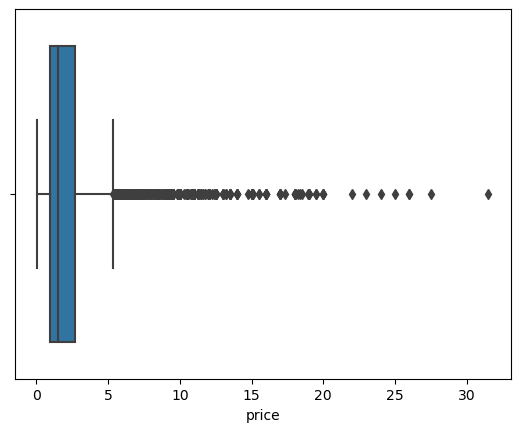

In [63]:
# lets see the box plot

sns.boxplot(x = df['price'])

# we can see price above anything 5 crores are outliers

In [64]:
# function to calculate outliers

def get_outliers(data):

    # lets calculate IQR for the 'price' column
    Q1 = df[data].quantile(0.25)
    Q3 = df[data].quantile(0.75)
    IQR = Q3 - Q1
    print('IQR :', IQR, '\n')

    # lets define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Lets identify outliers
    outliers = df[(df[data] < lower_bound) | (df[data] > upper_bound)]

    # lets display num_of_outliers and statistics
    num_outliers = outliers.shape[0]
    outliers_stats = outliers[data].describe()

    print('num_of_outliers :', num_outliers, '\n')
    print(outliers_stats)

In [65]:
get_outliers('price')

IQR : 1.7600000000000002 

num_of_outliers : 432 

count    432.000000
mean       9.196157
std        4.061291
min        5.350000
25%        6.400000
50%        8.000000
75%       10.607500
max       31.500000
Name: price, dtype: float64


## 2. price_per_sqft

/var/folders/fn/wz542gys40z4t4dnd28rwlkc0000gn/T/ipykernel_95351/172923880.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<AxesSubplot: xlabel='price_per_sqft', ylabel='Density'>

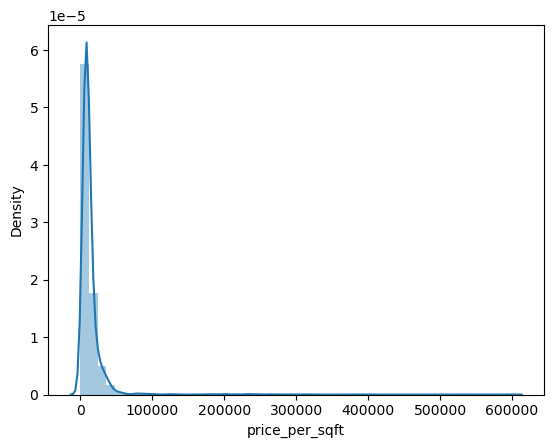

In [66]:
sns.distplot(df['price_per_sqft'])

# we can see the data is more right skewed

<AxesSubplot: xlabel='price_per_sqft'>

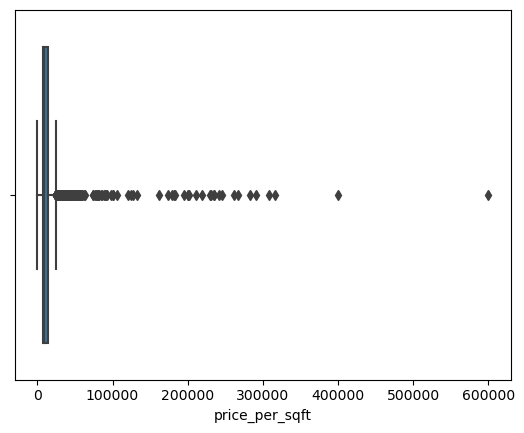

In [67]:
# lets plot boxplot and see

sns.boxplot(x = df['price_per_sqft'])

# There are lot of outliers

In [68]:
# calling get_outliers function on 'price_per_sqft' column
get_outliers('price_per_sqft')

IQR : 6957.0 

num_of_outliers : 367 

count       367.000000
mean      52115.435967
std       60746.225927
min       24202.000000
25%       27778.000000
50%       33333.000000
75%       41790.000000
max      600000.000000
Name: price_per_sqft, dtype: float64


In [69]:
# converting sqyards to sqfts and changing price_per_sqft values accordingly

df['area'] = df['area'].apply(lambda x:x*9 if x < 1000 else x)
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])
df['price_per_sqft'].describe()

count     3785.000000
mean     10319.711229
std       8802.306163
min          4.000000
25%       5556.000000
50%       8384.000000
75%      12658.000000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [70]:
df.update(df)

/var/folders/fn/wz542gys40z4t4dnd28rwlkc0000gn/T/ipykernel_95351/1776394762.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<AxesSubplot: xlabel='price_per_sqft', ylabel='Density'>

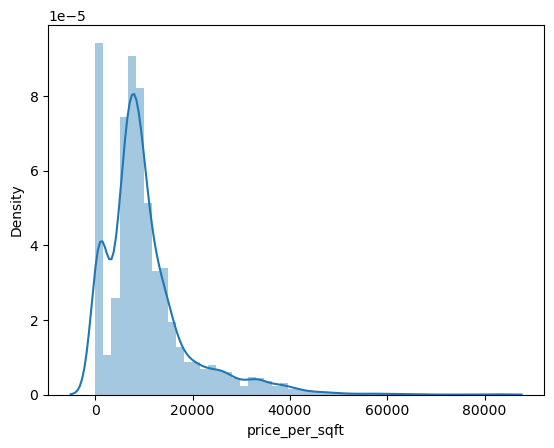

In [71]:
# now lets again check the distribution of price_per_sqft column

sns.distplot(df['price_per_sqft'])

<AxesSubplot: xlabel='price_per_sqft'>

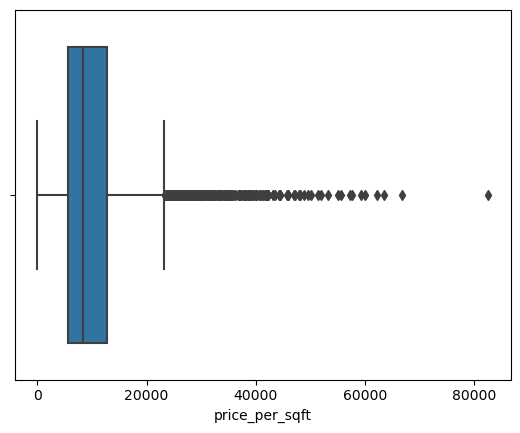

In [72]:
# boxplot after modifying price_per_sqft values

sns.boxplot(x = df['price_per_sqft'])

In [73]:
# price_per_sqft greater than 50000

df[df['price_per_sqft'] > 50000].shape[0]

13

In [74]:
# removing those values considering as outliers

df = df[df['price_per_sqft'] <= 50000]

In [75]:
df.shape

(3772, 23)

## 3. Area

/var/folders/fn/wz542gys40z4t4dnd28rwlkc0000gn/T/ipykernel_95351/2797503930.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<AxesSubplot: xlabel='area', ylabel='Density'>

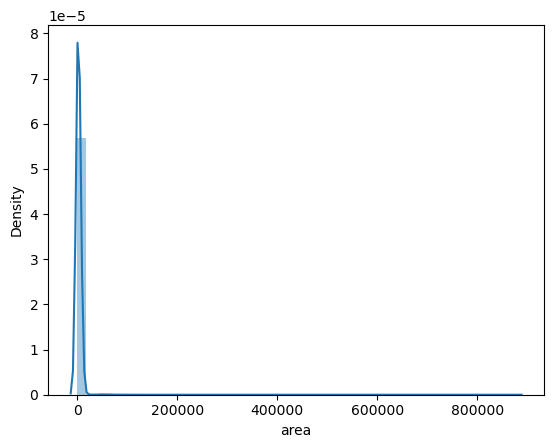

In [76]:
# distribution plot for area

sns.distplot(df['area'])

# here the data is right skewed

<AxesSubplot: xlabel='area'>

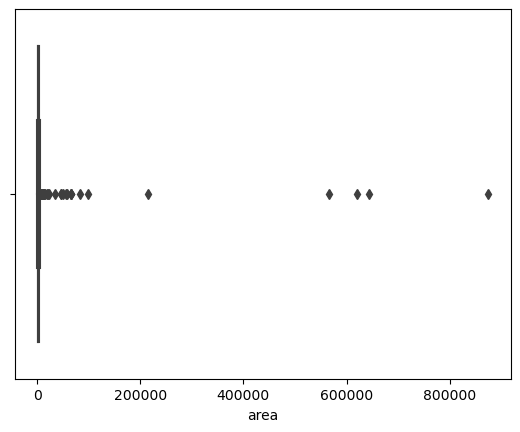

In [77]:
sns.boxplot(x = df['area'])

In [78]:
# statistical count of 'area' columns
df['area'].describe()

count      3772.000000
mean       3780.049841
std       22832.324786
min         450.000000
25%        1565.000000
50%        2048.000000
75%        3240.000000
max      875000.000000
Name: area, dtype: float64

In [79]:
# area lessthan 10k
df = df[df['area'] < 100000]

/var/folders/fn/wz542gys40z4t4dnd28rwlkc0000gn/T/ipykernel_95351/91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<AxesSubplot: xlabel='area', ylabel='Density'>

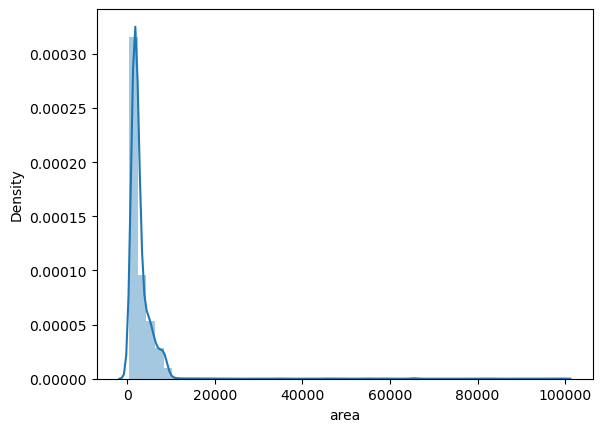

In [80]:
sns.distplot(df['area'])

<AxesSubplot: xlabel='area'>

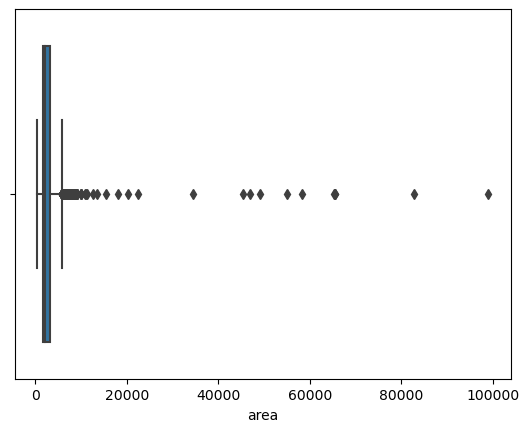

In [81]:
sns.boxplot(x=df['area'])

# some change we can see in expansion of area

In [82]:
# removing area values greater than 10000

df[df['area'] > 10000].sort_values('area',ascending=False)

property_type                    society           sector  price  \
1498         house                independent        sector 26  18.40   
2041         house  ganpati heights apartment        sector 13   1.25   
2866          flat                 rof ananda        sector 95   0.38   
2636          flat                 rof ananda        sector 95   0.38   
2808         house      dlf city plot phase 4        sector 28  13.00   
2040          flat              pyramid elite        sector 86   0.46   
3414          flat                 rof ananda        sector 95   0.33   
1822          flat      signature the serenas       sohna road   0.28   
2088         house                independent        sector 25   7.30   
439           flat            ramsons kshitij        sector 95   0.24   
962           flat                 rof ananda        sector 95   0.21   
3130         house                independent        sector 57   6.25   
2            house                independent        sector 43   5.50   
1603          flat                 godrej air        sector 85   2.50   
3366         house       unitech aspen greens        sector 50   6.95   
2160         house                independent         sector 4   0.85   
3354          flat                godrej icon       sector 88a   1.75   
1782         house                independent        sector 43  27.50   
2387          flat             m3m golfestate        sector 65  13.20   
1039         house                independent  sohna road road   5.50   

      price_per_sqft     area  \
1498          1859.0  98978.0   
2041           151.0  82781.0   
2866            58.0  65517.0   
2636            58.0  65517.0   
2808          1992.0  65261.0   
2040            79.0  58228.0   
3414            60.0  55000.0   
1822            57.0  49123.0   
2088          1560.0  46795.0   
439             53.0  45283.0   
962             61.0  34426.0   
3130          2778.0  22498.0   
2             2716.0  20250.0   
1603          1379.0  18129.0   
3366          4490.0  15479.0   
2160           630.0  13492.0   
3354          1384.0  12645.0   
1782         24366.0  11286.0   
2387         12000.0  11000.0   
1039          5093.0  10799.0   

                                           areaWithType  bedRoom  bathroom  \
1498  Plot area 502(419.74 sq.m.)Carpet area: 11000 ...        6         8   
2041                       Plot area 115(7692.86 sq.m.)       10         6   
2866                 Carpet area: 64529 (5994.94 sq.m.)        2         2   
2636                 Carpet area: 64412 (5984.07 sq.m.)        3         2   
2808                  Carpet area: 7250 (6061.92 sq.m.)       10        10   
2040                 Carpet area: 58141 (5401.48 sq.m.)        2         2   
3414                 Carpet area: 54917 (5101.96 sq.m.)        2         2   
1822                 Carpet area: 48811 (4534.69 sq.m.)        1         1   
2088  Plot area 215(179.77 sq.m.)Built Up area: 5800...        9         9   
439                  Carpet area: 45966 (4270.38 sq.m.)        2         2   
962                  Carpet area: 34401 (3195.96 sq.m.)        1         1   
3130  Plot area 3100(2591.99 sq.m.)Built Up area: 26...        9         9   
2     Plot area 215(179.77 sq.m.)Built Up area: 2850...        8         7   
1603                 Carpet area: 18122 (1683.59 sq.m.)        4         5   
3366  Plot area 240(200.67 sq.m.)Built Up area: 2160...        3         3   
2160                      Plot area 1500(1254.19 sq.m.)        3         3   
3354                               Carpet area: 1175.11        3         3   
1782                       Plot area 1254(1048.5 sq.m.)        6         7   
2387                 Carpet area: 11000 (1021.93 sq.m.)        4         4   
1039  Plot area 1200(1003.35 sq.m.)Built Up area: 35...        3         3   

     balcony  ...  super_built_up_area built_up_area carpet_area  study room  \
1498      3+  ...                  NaN           NaN    11

In [83]:
df[df['area'] > 10000].sort_values('area',ascending=False).index

Int64Index([1498, 2041, 2866, 2636, 2808, 2040, 3414, 1822, 2088,  439,  962,
            3130,    2, 1603, 3366, 2160, 3354, 1782, 2387, 1039],
           dtype='int64')

In [84]:
# dropping all index values where area > 10000

df.drop(index=[1498, 2041, 2866, 2636, 2808, 2040, 3414, 1822, 2088,  439,  962,
            3130,    2, 1603, 3366, 2160, 3354, 1782, 2387, 1039], inplace=True)

In [85]:
df.loc[48,'area'] = 115*9
df.loc[300,'area'] = 7250
df.loc[2666,'area'] = 5800
df.loc[1358,'area'] = 2660
df.loc[3195,'area'] = 2850
df.loc[2131,'area'] = 1812
df.loc[3088,'area'] = 2160
df.loc[3444,'area'] = 1175

/var/folders/fn/wz542gys40z4t4dnd28rwlkc0000gn/T/ipykernel_95351/1578405920.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<AxesSubplot: xlabel='area', ylabel='Density'>

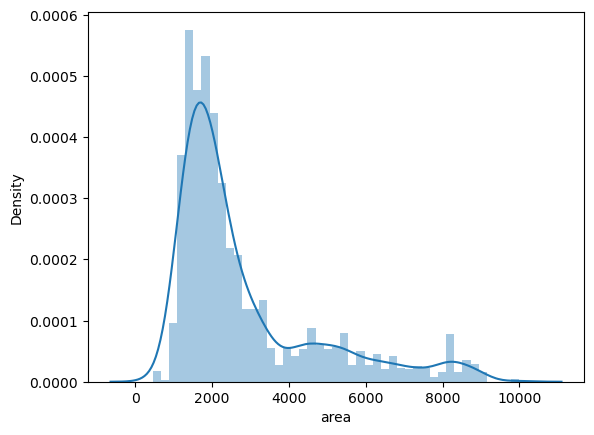

In [86]:
# as we can see now the data is normally distributed for area column
sns.distplot(df['area'])

<AxesSubplot: xlabel='area'>

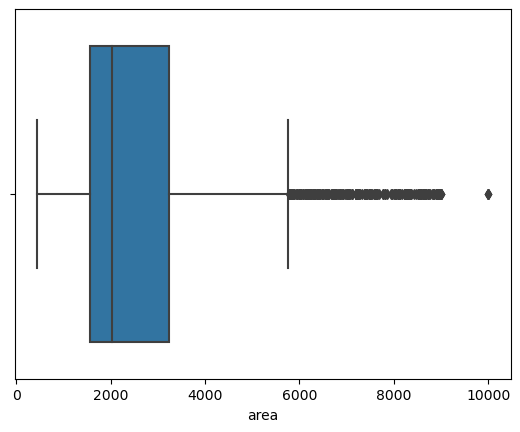

In [87]:
sns.boxplot(x = df['area'])

In [88]:
df['area'].describe()

count     3747.000000
mean      2810.481185
std       1888.370491
min        450.000000
25%       1557.000000
50%       2040.000000
75%       3240.000000
max      10000.000000
Name: area, dtype: float64

## 4. Bedroom

/var/folders/fn/wz542gys40z4t4dnd28rwlkc0000gn/T/ipykernel_95351/1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<AxesSubplot: xlabel='bedRoom', ylabel='Density'>

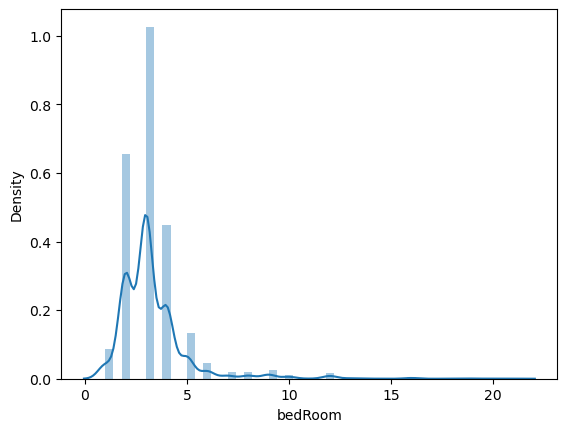

In [89]:
sns.distplot(df['bedRoom'])

<AxesSubplot: xlabel='bedRoom'>

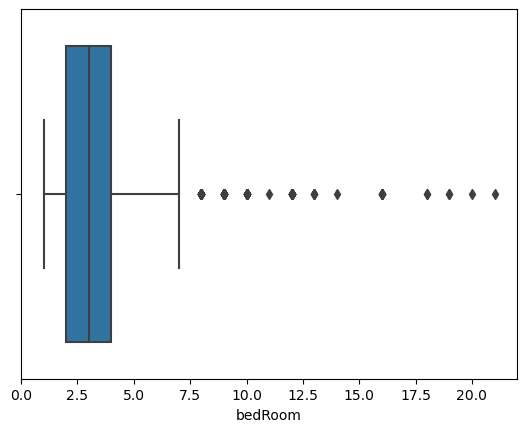

In [90]:
sns.boxplot(x=df['bedRoom'])

In [91]:
df['bedRoom'].describe()

count    3747.000000
mean        3.303176
std         1.799151
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [92]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

property_type                      society      sector  price  \
1999         house                  independent   sector 54   5.00   
1620         house                  independent   sector 43   4.50   
27           house                  independent  sector 17a   3.87   
1771         house                  independent  sector 17a   3.93   
2446         house                  independent   sector 54   5.50   
1418         house                private house   sector 55   7.05   
1223         house                  independent   sector 40  12.00   
2343         house                  independent   sector 56  12.39   
1985         house                  independent   sector 11   4.50   
1923         house               dlf city plots   sector 26  20.00   
1261         house                  independent   sector 55   9.19   
1297         house       luxury dlf city floors   sector 26  20.00   
301          house                  independent   sector 43  13.50   
233          house                  independent   sector 24   3.20   
1258         house       dlf city plots phase 3   sector 24   5.00   
352          house                  independent  sector 104   0.80   
1409         house                  independent   sector 28  11.00   
3703         house          huda plot sector 38   sector 38   4.30   
1140         house                  independent   sector 43   7.50   
593          house  independent house sector 45   sector 40   9.00   
3619         house                  independent   sector 46   6.81   
3610         house       laxmi garden sector-11   sector 11   1.50   
3529         house                  independent   sector 43   2.20   
3170         house               uppal southend   sector 49   6.75   
2948         house                  independent   sector 40   9.50   
2505         house                  independent   sector 56  11.50   
124          house                  independent   sector 46   6.50   
2437         house                  independent   sector 47   6.09   
207          house                  independent   sector 26  10.50   
2069         house                  independent   sector 27   8.25   
232          house                  independent   sector 55   7.49   
921          house       dlf city plots phase 2   sector 25  10.00   
268          house                  independent   sector 13   0.50   
1886         house       luxury dlf city floors   sector 26   8.25   
756          house             dlf city phase 1   sector 26   9.25   
342          house               uppal southend   sector 49   6.75   
1568         house                  independent   sector 26   8.49   
1079         house                  independent   sector 56  11.95   
1083         house                  independent   sector 43   3.00   
1358         house                  independent   sector 31   9.25   
34           house    floor wise designer kothi   sector 25  13.00   
484          house                  independent   sector 14   8.00   
1122         house               uppal southend   sector 49   6.75   
641          house                  independent   sector 57   6.95   
2570         house                  independent   sector 43   2.25   

      price_per_sqft    area  \
1999         43066.0  1161.0   
1620         39062.0  1152.0   
27            5160.0  7500.0   
1771         24214.0  1623.0   
2446         38194.0  1440.0   
1418         46906.0  1503.0   
1223         38986.0  3078.0   
2343         45889.0  2700.0   
1985         25000.0  1800.0   
1923         44267.0  4518.0   
1261         34037.0  2700.0   
1297         48888.0  4091.0   
301          50000.0  2700.0   
233           6584.0  4860.0   
1258         34083.0  1467.0   
352           8889.0   900.0   
1409         33951.0  3240.0   
3703         27302.0  1575.0   
1140         38760.0  1935.0   
593          38023.0  2367.0   
3619         36911.0  1845.0   
3610         12821.0  1170.0   
3529          6875.0  3200.0   
3170         323

In [93]:
df = df[df['bedRoom'] <= 10]

In [94]:
df.shape

(3702, 23)

/var/folders/fn/wz542gys40z4t4dnd28rwlkc0000gn/T/ipykernel_95351/2168605442.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<AxesSubplot: xlabel='bedRoom', ylabel='Density'>

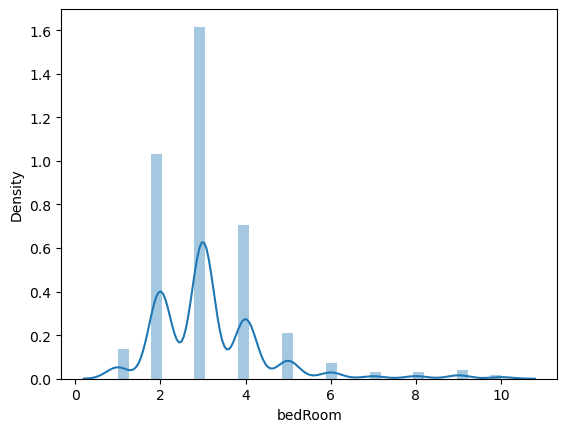

In [95]:
# now lets check the distribution of bedRoom data

sns.distplot(df['bedRoom'])

<AxesSubplot: xlabel='bedRoom'>

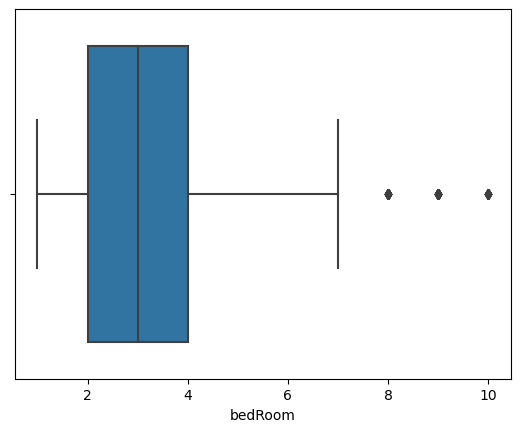

In [96]:
sns.boxplot(x = df['bedRoom'])

In [97]:
df['bedRoom'].describe()

count    3702.000000
mean        3.176931
std         1.365922
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

## 5. Bathroom

/var/folders/fn/wz542gys40z4t4dnd28rwlkc0000gn/T/ipykernel_95351/2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<AxesSubplot: xlabel='bathroom', ylabel='Density'>

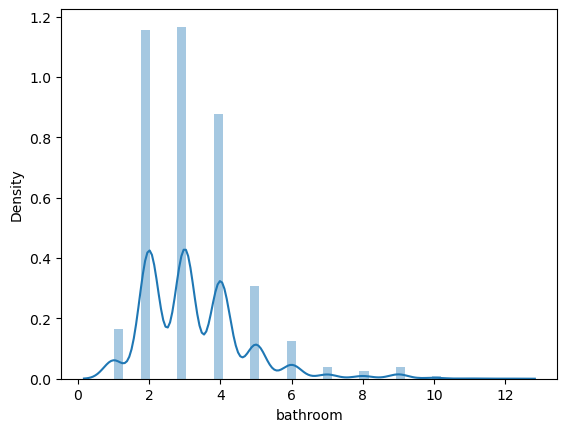

In [98]:
sns.distplot(df['bathroom'])

<AxesSubplot: xlabel='bathroom'>

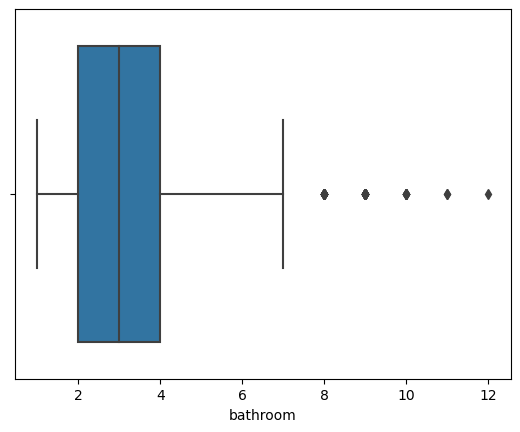

In [99]:
sns.boxplot(x = df['bathroom'])

In [100]:
# lets check for bathrooms greater than 10

df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

property_type               society     sector  price  price_per_sqft  \
2215         house  adani brahma samsara  sector 60  18.02         28200.0   
468          house           independent  sector 24  11.00         28902.0   
1971         house           independent  sector 39   7.00         10000.0   

        area                                       areaWithType  bedRoom  \
2215  6390.0                 Built Up area: 6390 (593.65 sq.m.)        9   
468   3806.0  Plot area 3806.45(353.63 sq.m.)Built Up area: ...        8   
1971  7000.0  Plot area 350(32.52 sq.m.)Built Up area: 7000 ...       10   

      bathroom balcony  ...  super_built_up_area built_up_area carpet_area  \
2215        12      3+  ...                  NaN        6390.0         NaN   
468         11      3+  ...                  NaN        5000.0         NaN   
1971        11      3+  ...                  NaN        7000.0         NaN   

      study room  servant room  store room  pooja room  others  \
2215           0             1           0           0       0   
468            1             1           0           1       1   
1971           0             0           0           1       0   

      furnishing_type  luxury_score  
2215                2           146  
468                 2            39  
1971                0            38  

[3 rows x 23 columns]

In [101]:
df.head()

property_type                 society      sector  price  price_per_sqft  \
0          flat  experion the heartsong  sector 108   1.68          8387.0   
1          flat         emaar digihomes   sector 62   2.45         16003.0   
3         house             independent   sector 38   3.90         21242.0   
4         house             independent   sector 27   4.25         31481.0   
5          flat          ats tourmaline  sector 109   1.75          8140.0   

     area                                       areaWithType  bedRoom  \
0  2003.0  Super Built up area 2003(186.08 sq.m.)Built Up...        3   
1  1531.0  Built Up area: 1200 (111.48 sq.m.)Carpet area:...        2   
3  1836.0                        Plot area 204(170.57 sq.m.)        6   
4  1350.0  Plot area 163(136.29 sq.m.)Built Up area: 161 ...        5   
5  2150.0             Super Built up area 2150(199.74 sq.m.)        3   

   bathroom balcony  ...  super_built_up_area built_up_area carpet_area  \
0         3      3+  ...               2003.0       1338.29      986.41   
1         2       2  ...                  NaN       1200.00     1000.00   
3         6      3+  ...                  NaN       1836.00         NaN   
4         5      3+  ...                  NaN        161.00      150.00   
5         4      3+  ...               2150.0           NaN         NaN   

   study room  servant room  store room  pooja room  others  furnishing_type  \
0           1             1           0           0       0                2   
1           1             0           0           0       0                0   
3           1             1           0           1       0                1   
4           0             1           0           1       0                2   
5           0             1           0           0       1                1   

   luxury_score  
0            86  
1           174  
3            32  
4            49  
5            65  

[5 rows x 23 columns]

## 6. super built up area

/var/folders/fn/wz542gys40z4t4dnd28rwlkc0000gn/T/ipykernel_95351/4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<AxesSubplot: xlabel='super_built_up_area', ylabel='Density'>

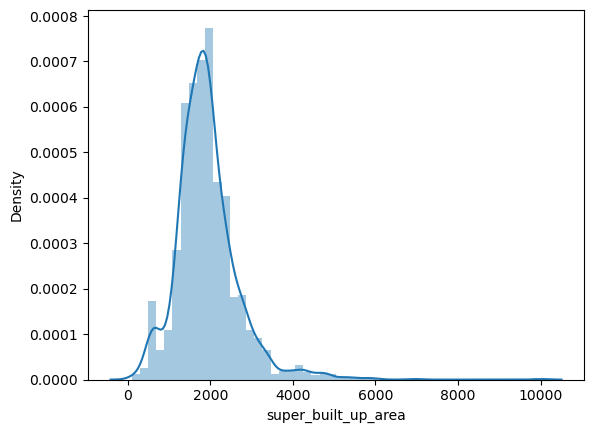

In [102]:
sns.distplot(df['super_built_up_area'])

<AxesSubplot: xlabel='super_built_up_area'>

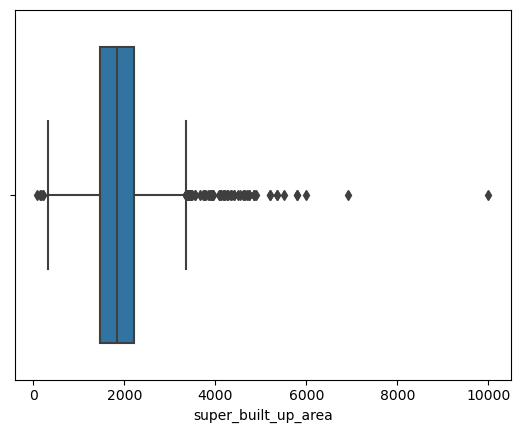

In [103]:
sns.boxplot(x=df['super_built_up_area'])

In [104]:
df['super_built_up_area'].describe()

count     1915.000000
mean      1921.658251
std        767.160169
min         89.000000
25%       1457.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [105]:
# There are only 2 records where super_built_up_area is > 6000
df[df['super_built_up_area'] > 6000]

property_type                      society       sector  price  \
2312          flat  bestech park view grand spa    sector 81    4.7   
2770          flat       krrish provence estate  gwal pahari    7.5   

      price_per_sqft     area                             areaWithType  \
2312          6786.0   6926.0   Super Built up area 6926(643.45 sq.m.)   
2770          7500.0  10000.0  Super Built up area 10000(929.03 sq.m.)   

      bedRoom  bathroom balcony  ...  super_built_up_area built_up_area  \
2312        4         4      3+  ...               6926.0           NaN   
2770        5         6      3+  ...              10000.0           NaN   

     carpet_area  study room  servant room  store room  pooja room  others  \
2312         NaN           0             1           0           0       0   
2770         NaN           0             1           0           1       1   

      furnishing_type  luxury_score  
2312                2           140  
2770                1            49  

[2 rows x 23 columns]

In [106]:
df.shape

(3702, 23)

## 7. built up area

/var/folders/fn/wz542gys40z4t4dnd28rwlkc0000gn/T/ipykernel_95351/1332204896.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<AxesSubplot: xlabel='built_up_area', ylabel='Density'>

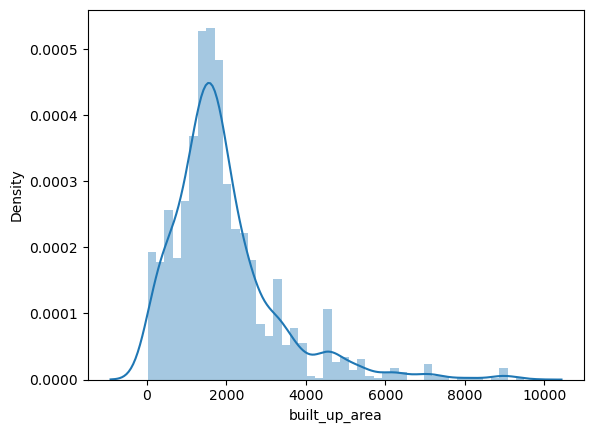

In [107]:
sns.distplot(df['built_up_area'])

# it seems to be a little right skewed, but its normally distributed too

<AxesSubplot: xlabel='built_up_area'>

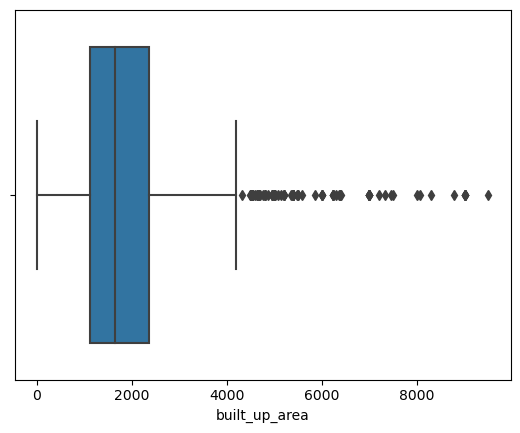

In [108]:
sns.boxplot(x=df['built_up_area'])

In [109]:
# there are no records where built_up_area is > 10000
df[df['built_up_area'] > 10000]

Empty DataFrame
Columns: [property_type, society, sector, price, price_per_sqft, area, areaWithType, bedRoom, bathroom, balcony, floorNum, facing, agePossession, super_built_up_area, built_up_area, carpet_area, study room, servant room, store room, pooja room, others, furnishing_type, luxury_score]
Index: []

[0 rows x 23 columns]

In [111]:
df.shape

(3702, 23)

## 8. carpet area

/var/folders/fn/wz542gys40z4t4dnd28rwlkc0000gn/T/ipykernel_95351/3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<AxesSubplot: xlabel='carpet_area', ylabel='Density'>

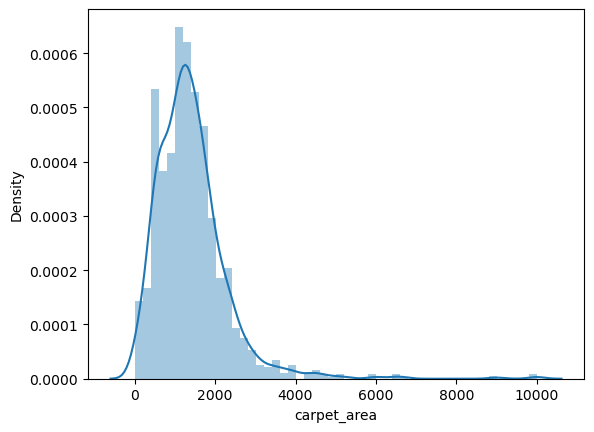

In [52]:
sns.distplot(df['carpet_area'])

<AxesSubplot: xlabel='carpet_area'>

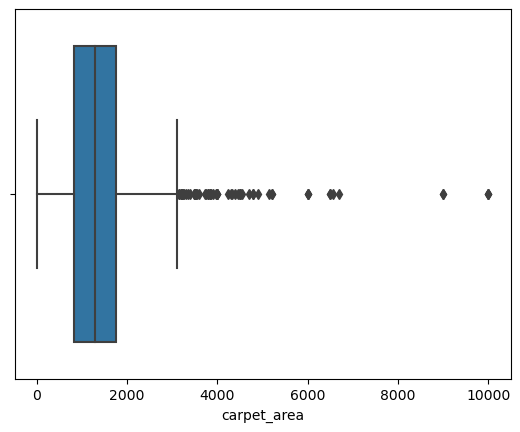

In [53]:
sns.boxplot(x = df['carpet_area'])

In [54]:
# no records where carpet_area is > 10000
df[df['carpet_area'] > 10000]

Empty DataFrame
Columns: [property_type, society, sector, price, price_per_sqft, area, areaWithType, bedRoom, bathroom, balcony, floorNum, facing, agePossession, super_built_up_area, built_up_area, carpet_area, study room, servant room, store room, pooja room, others, furnishing_type, luxury_score]
Index: []

[0 rows x 23 columns]

In [55]:
df.loc[2131,'carpet_area'] = 1812

In [56]:
df[df['carpet_area'] > 10000]

Empty DataFrame
Columns: [property_type, society, sector, price, price_per_sqft, area, areaWithType, bedRoom, bathroom, balcony, floorNum, facing, agePossession, super_built_up_area, built_up_area, carpet_area, study room, servant room, store room, pooja room, others, furnishing_type, luxury_score]
Index: []

[0 rows x 23 columns]

In [112]:
df.head()

property_type                 society      sector  price  price_per_sqft  \
0          flat  experion the heartsong  sector 108   1.68          8387.0   
1          flat         emaar digihomes   sector 62   2.45         16003.0   
3         house             independent   sector 38   3.90         21242.0   
4         house             independent   sector 27   4.25         31481.0   
5          flat          ats tourmaline  sector 109   1.75          8140.0   

     area                                       areaWithType  bedRoom  \
0  2003.0  Super Built up area 2003(186.08 sq.m.)Built Up...        3   
1  1531.0  Built Up area: 1200 (111.48 sq.m.)Carpet area:...        2   
3  1836.0                        Plot area 204(170.57 sq.m.)        6   
4  1350.0  Plot area 163(136.29 sq.m.)Built Up area: 161 ...        5   
5  2150.0             Super Built up area 2150(199.74 sq.m.)        3   

   bathroom balcony  ...  super_built_up_area built_up_area carpet_area  \
0         3      3+  ...               2003.0       1338.29      986.41   
1         2       2  ...                  NaN       1200.00     1000.00   
3         6      3+  ...                  NaN       1836.00         NaN   
4         5      3+  ...                  NaN        161.00      150.00   
5         4      3+  ...               2150.0           NaN         NaN   

   study room  servant room  store room  pooja room  others  furnishing_type  \
0           1             1           0           0       0                2   
1           1             0           0           0       0                0   
3           1             1           0           1       0                1   
4           0             1           0           1       0                2   
5           0             1           0           0       1                1   

   luxury_score  
0            86  
1           174  
3            32  
4            49  
5            65  

[5 rows x 23 columns]

## 9. luxury_score

/var/folders/fn/wz542gys40z4t4dnd28rwlkc0000gn/T/ipykernel_95351/3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<AxesSubplot: xlabel='luxury_score', ylabel='Density'>

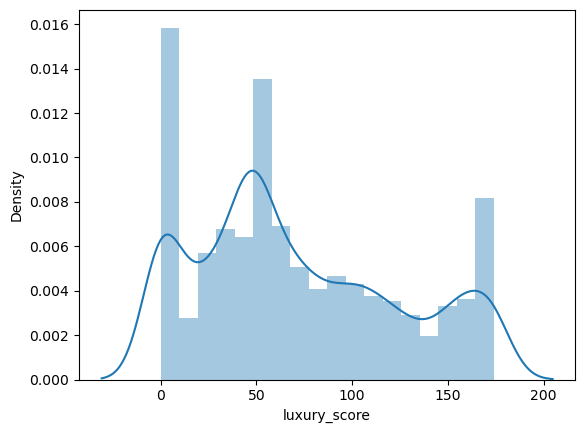

In [113]:
sns.distplot(df['luxury_score'])

<AxesSubplot: xlabel='luxury_score'>

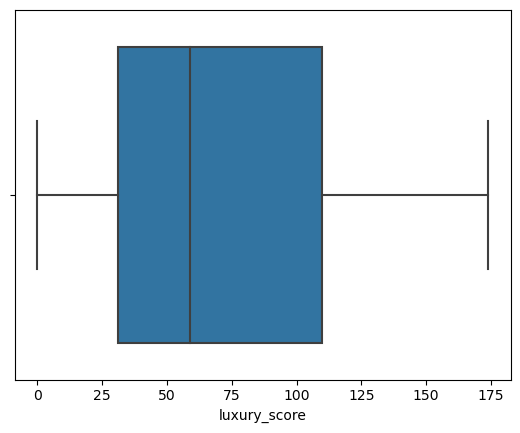

In [117]:
sns.boxplot(x = df['luxury_score'])

# no outliers in luxury_score

In [118]:
df.shape

(3702, 23)

In [119]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [120]:
df.head()

property_type                 society      sector  price  price_per_sqft  \
0          flat  experion the heartsong  sector 108   1.68          8387.0   
1          flat         emaar digihomes   sector 62   2.45         16003.0   
3         house             independent   sector 38   3.90         21242.0   
4         house             independent   sector 27   4.25         31481.0   
5          flat          ats tourmaline  sector 109   1.75          8140.0   

     area                                       areaWithType  bedRoom  \
0  2003.0  Super Built up area 2003(186.08 sq.m.)Built Up...        3   
1  1531.0  Built Up area: 1200 (111.48 sq.m.)Carpet area:...        2   
3  1836.0                        Plot area 204(170.57 sq.m.)        6   
4  1350.0  Plot area 163(136.29 sq.m.)Built Up area: 161 ...        5   
5  2150.0             Super Built up area 2150(199.74 sq.m.)        3   

   bathroom balcony  ...  super_built_up_area built_up_area carpet_area  \
0         3      3+  ...               2003.0       1338.29      986.41   
1         2       2  ...                  NaN       1200.00     1000.00   
3         6      3+  ...                  NaN       1836.00         NaN   
4         5      3+  ...                  NaN        161.00      150.00   
5         4      3+  ...               2150.0           NaN         NaN   

   study room  servant room  store room  pooja room  others  furnishing_type  \
0           1             1           0           0       0                2   
1           1             0           0           0       0                0   
3           1             1           0           1       0                1   
4           0             1           0           1       0                2   
5           0             1           0           0       1                1   

   luxury_score  
0            86  
1           174  
3            32  
4            49  
5            65  

[5 rows x 23 columns]

/var/folders/fn/wz542gys40z4t4dnd28rwlkc0000gn/T/ipykernel_95351/2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<AxesSubplot: xlabel='price_per_sqft', ylabel='Density'>

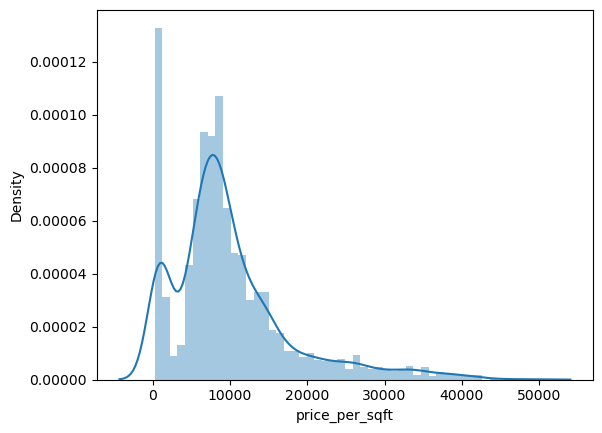

In [121]:
sns.distplot(df['price_per_sqft'])

<AxesSubplot: >

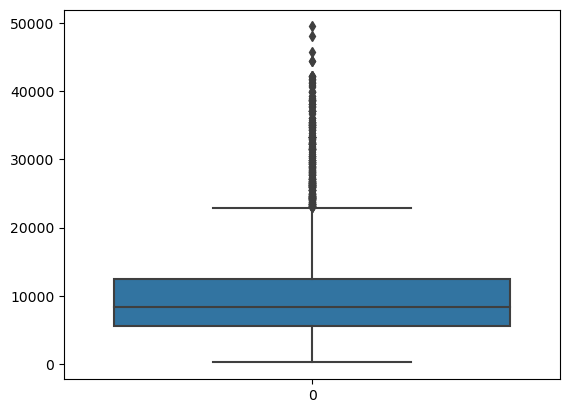

In [122]:
sns.boxplot(df['price_per_sqft'])

In [123]:
df[df['price_per_sqft'] > 42000]

property_type                       society      sector  price  \
345          house                   independent   sector 26   20.0   
930          house                dlf city plots   sector 26   19.0   
1159         house                   independent  sector 105    9.9   
1254         house                   independent   sector 25   13.0   
1947         house                   independent   sector 55    5.0   
2831         house                   independent   sector 28   12.0   
3014         house  sushant lok 1 builder floors   sector 43   13.0   
3154         house                   independent   sector 43    9.5   
3649         house                   independent   sector 26   19.0   

      price_per_sqft    area  \
345          44444.0  4500.0   
930          42054.0  4518.0   
1159         49500.0  2000.0   
1254         45710.0  2844.0   
1947         44444.0  1125.0   
2831         42194.0  2844.0   
3014         48148.0  2700.0   
3154         42222.0  2250.0   
3649         42222.0  4500.0   

                                           areaWithType  bedRoom  bathroom  \
345                         Plot area 500(418.06 sq.m.)        5         7   
930                         Plot area 502(419.74 sq.m.)        6         6   
1159  Built Up area: 2000 (185.81 sq.m.)Carpet area:...        2         2   
1254                        Plot area 316(264.22 sq.m.)        6         8   
1947  Plot area 125(104.52 sq.m.)Built Up area: 115 ...        9         9   
2831                        Plot area 316(264.22 sq.m.)        4         5   
3014                        Plot area 300(250.84 sq.m.)        3         3   
3154  Plot area 302(252.51 sq.m.)Built Up area: 300 ...        5         5   
3649                        Plot area 500(418.06 sq.m.)        6         8   

     balcony  ...  super_built_up_area built_up_area carpet_area  study room  \
345       3+  ...                  NaN        4500.0         NaN           0   
930        3  ...                  NaN        4518.0         NaN           1   
1159       2  ...                  NaN        2000.0      1800.0           0   
1254      3+  ...                  NaN        2844.0         NaN           1   
1947      3+  ...                  NaN         115.0       100.0           0   
2831      3+  ...                  NaN        2844.0         NaN           0   
3014      3+  ...                  NaN        2700.0         NaN           0   
3154      3+  ...                  NaN         300.0       250.0           0   
3649      3+  ...                  NaN        4500.0         NaN           1   

      servant room  store room  pooja room  others  furnishing_type  \
345              1           0           1       0                0   
930              1           0           0       0                2   
1159             0           0           0       0                1   
1254             1           1           1       0                0   
1947             0           0           0       1                2   
2831             1           1           1       0                2   
3014             0           0           1       0                2   
3154             1           0           1       0                2   
3649             1           1           1       0                2   

      luxury_score  
345             97  
930            121  
1159             0  
1254             0  
1947            44  
2831            60  
3014             7  
3154            88  
3649           103  

[9 rows x 23 columns]

In [124]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)

337.81

In [125]:
df[(df['area']/df['bedRoom'])<183]

property_type               society           sector  price  \
10           house                 ansal        sector 43   1.85   
277          house           independent  sohna road road   0.95   
281          house  bhim nagar, sector 6         sector 6   0.85   
384          house           independent        sector 41   4.25   
405          house             rk excelo        sector 12   0.60   
496          house        sector 57 huda        sector 57   3.80   
571          house           independent        sector 55   1.45   
705          house           independent        sector 12   1.00   
862          house           independent        sector 13   1.50   
914          house           independent          manesar   0.80   
1150         house           independent         sector 4   0.60   
1566         house           independent         sector 2   0.98   
1575         house           independent        sector 12   0.65   
1947         house           independent        sector 55   5.00   
2289         house           independent        sector 24   4.50   
2402         house         sector 38 rwa        sector 38   4.30   
2495         house           independent        sector 28   0.45   
2765         house           independent         sector 9   1.25   
2936         house           independent       sector 104   0.60   
3079         house              ss omnia        sector 86   0.42   
3458         house           independent         sector 2   3.65   
3662         house           independent         sector 2   1.00   
3715         house           independent       sector 105   0.55   

      price_per_sqft    area  \
10           34259.0   540.0   
277           8920.0  1065.0   
281          14096.0   603.0   
384          26235.0  1620.0   
405          13333.0   450.0   
496          26063.0  1458.0   
571          26852.0   540.0   
705           8230.0  1215.0   
862          11538.0  1300.0   
914           6667.0  1200.0   
1150         11696.0   513.0   
1566          9074.0  1080.0   
1575          6500.0  1000.0   
1947         44444.0  1125.0   
2289         33333.0  1350.0   
2402         28782.0  1494.0   
2495         10000.0   450.0   
2765          8735.0  1431.0   
2936          5128.0  1170.0   
3079          9333.0   450.0   
3458         23443.0  1557.0   
3662          8230.0  1215.0   
3715         10913.0   504.0   

                                           areaWithType  bedRoom  bathroom  \
10                             Plot area 60(5.57 sq.m.)        8         8   
277                         Plot area 1065(98.94 sq.m.)       10        10   
281                            Plot area 67(6.22 sq.m.)        5         2   
384                          Plot area 180(150.5 sq.m.)       10         9   
405   Plot area 50(4.65 sq.m.)Built Up area: 30 sq.f...        5         3   
496   Plot area 162(135.45 sq.m.)Built Up area: 162 ...        8         8   
571                            Plot area 60(5.57 sq.m.)        4         4   
705   Plot area 135(12.54 sq.m.)Built Up area: 3750 ...        9         7   
862                        Plot area 1300(120.77 sq.m.)       10         7   
914                        Plot area 1200(111.48 sq.m.)        8         8   
1150                            Plot area 57(5.3 sq.m.)        3         3   
1566                    Carpet area: 120 (100.34 sq.m.)        9         4   
1575                     Carpet area: 1000 (92.9 sq.m.)        6         2   
1947  Plot area 125(104.52 sq.m.)Built Up area: 115 ...        9         9   
2289  Plot area 163(136.29 sq.m.)Built Up area: 160 ...       10         8   
2402  Plot area 166(138.8 sq.m.)Built Up area: 165 s...        9         9   
2495                     Built Up area: 50 (4.65 sq.m.)        5         3   
2765                        Plot area 159(132.94 sq.m.)       10         6   
2936                         Plot area 130(108.7 sq.m.)        7         3   
3079                           Plot area 50

In [126]:
df.shape

(3702, 23)

In [127]:
df.to_csv('indian_properties_cleaned_outliers.csv', index=None)